In [4]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 

patients = pd.read_csv('raw_data/T_demo.csv')
labels = pd.read_csv('raw_data/T_stage.csv')
# labels.Stage_Progress = labels.Stage_Progress.replace({True:1, False:0})
meds = pd.read_csv('raw_data/T_meds.csv')

In [5]:
# staging=staging.rename(columns={'Stage_Progress':'target_class'})
df = patients.merge(labels, on='id', how='left')

In [6]:
patients['gender'] = np.where(patients['gender']=='Female',1,0)
patients = pd.concat([patients.drop('race',axis=1),pd.get_dummies(patients['race'])],axis=1)

In [7]:
labels.Stage_Progress.value_counts()

False    200
True     100
Name: Stage_Progress, dtype: int64

In [8]:
for i in range(0,15):
    print(meds[meds.id==i].sort_values(by='start_day'))

    id          drug  daily_dosage  start_day  end_day
0    0  atorvastatin          10.0         19      109
2    0      losartan         100.0         19      289
5    0     metformin        1000.0         19      109
1    0  atorvastatin          10.0        117      207
6    0     metformin        1000.0        131      281
7    0     metformin        1000.0        309      399
8    0     metformin        1000.0        312      462
3    0      losartan         100.0        403      493
9    0     metformin        1000.0        467      557
10   0     metformin        1000.0        551      641
4    0      losartan         100.0        587      677
    id          drug  daily_dosage  start_day  end_day
11   1  atorvastatin          20.0         43      133
12   1  atorvastatin          20.0         96      126
13   1  atorvastatin          40.0        295      385
14   1  atorvastatin          40.0        394      484
    id          drug  daily_dosage  start_day  end_day
15   2  ro

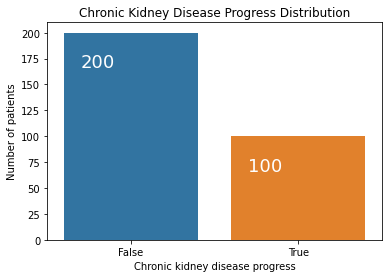

In [9]:
ax= sns.countplot(x='Stage_Progress', data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
# ax.set(xlabel='Chronic kidney disease progress', ylabel='Number of patients')

plt.xlabel("Chronic kidney disease progress")
plt.ylabel("Number of patients")
plt.title("Chronic Kidney Disease Progress Distribution") # You can comment this line out if you don't need title
plt.show(ax)
ax.figure.savefig('disease_progress.png')

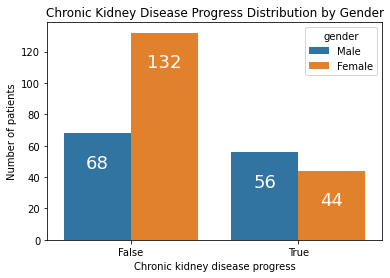

In [10]:
ax= sns.countplot(x='Stage_Progress', hue='gender', data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
# ax.set(xlabel='Chronic kidney disease progress', ylabel='Number of patients')

plt.xlabel("Chronic kidney disease progress")
plt.ylabel("Number of patients")
plt.title("Chronic Kidney Disease Progress Distribution by Gender") # You can comment this line out if you don't need title
plt.show(ax)
ax.figure.savefig('gender_disease_progress.png')

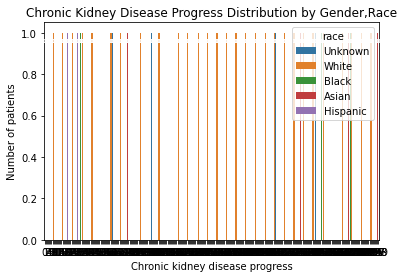

In [11]:
ax= sns.countplot(x='id', hue='race', data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.05, p.get_height()), ha='center', va='top', color='white', size=6)
# ax.set(xlabel='Chronic kidney disease progress', ylabel='Number of patients')

plt.xlabel("Chronic kidney disease progress")
plt.ylabel("Number of patients")
plt.title("Chronic Kidney Disease Progress Distribution by Gender,Race") # You can comment this line out if you don't need title
plt.show(ax)
ax.figure.savefig('race_And_gender.png')

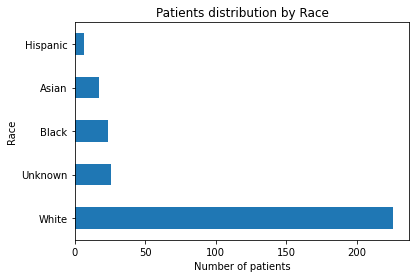

In [13]:
#race distribution of chronic kidney disease patients 
fig = df['race'].value_counts().plot(kind='barh')

plt.xlabel("Number of patients")
plt.ylabel("Race")
plt.title("Patients distribution by Race") # You can comment this line out if you don't need title
plt.show()
fig.figure.savefig('race_dist.png')

In [14]:
#average age for each gender 
df[["gender", "age"]].groupby("gender").mean()

,age
gender,
Female,69.875000
Male,71.104839


In [15]:
print(f"Patients data age statistics {df['age'].describe()}")
print(f"Female patients age statistics {df[df.gender=='Female']['age'].describe()}")
print(f"Male patients age statistics {df[df.gender=='Male']['age'].describe()}")

Patients data age statistics count    300.000000
mean      70.383333
std        9.247058
min       46.000000
25%       64.000000
50%       71.000000
75%       78.000000
max       86.000000
Name: age, dtype: float64
Female patients age statistics count    176.000000
mean      69.875000
std        9.121168
min       46.000000
25%       64.000000
50%       71.000000
75%       77.000000
max       86.000000
Name: age, dtype: float64
Male patients age statistics count    124.000000
mean      71.104839
std        9.412687
min       46.000000
25%       65.750000
50%       72.000000
75%       79.000000
max       85.000000
Name: age, dtype: float64


In [16]:
data_dir = 'raw_data'
longtidunal_data_files = ["T_creatinine.csv",
"T_DBP.csv",
"T_glucose.csv",
"T_HGB.csv",
"T_ldl.csv",
"T_SBP.csv"]
 
dataframe_collection={}
import os 
for file in longtidunal_data_files:
    if file.endswith('csv'):
        filename = file.split(".")[0].lower()
        temp_df = pd.read_csv(os.path.join(data_dir,file))
        temp_df = temp_df.rename(columns={'value': filename.split('_')[1]}) 
        print(f"{filename} maximum date {temp_df['time'].max()}")
        dataframe_collection[filename] = temp_df
        
frames=[v for k,v in dataframe_collection.items()]
data = frames[0]
for frame in frames[1:]:
  data = data.merge(frame, how='outer', on=['id','time'])
data.head()

t_creatinine maximum date 699
t_dbp maximum date 699
t_glucose maximum date 699
t_hgb maximum date 1429
t_ldl maximum date 699
t_sbp maximum date 699


,id,creatinine,time,dbp,glucose,hgb,ldl,sbp
0,0,1.29,0,95.32,6.24,13.51,161.49,134.11
1,0,1.15,107,NaN,7.20,13.39,111.39,NaN
2,0,1.44,286,NaN,7.01,12.84,NaN,NaN
3,0,1.23,382,NaN,6.89,13.32,157.90,NaN
4,0,1.08,580,87.64,5.62,NaN,NaN,154.91


In [17]:
data = data[['id','time', 'creatinine',  'dbp', 'glucose', 'hgb', 'ldl', 'sbp']]
data.head(10)

,id,time,creatinine,dbp,glucose,hgb,ldl,sbp
0,0,0,1.29,95.32,6.24,13.51,161.49,134.11
1,0,107,1.15,NaN,7.20,13.39,111.39,NaN
2,0,286,1.44,NaN,7.01,12.84,NaN,NaN
3,0,382,1.23,NaN,6.89,13.32,157.90,NaN
4,0,580,1.08,87.64,5.62,NaN,NaN,154.91
5,0,688,1.23,NaN,5.78,13.53,NaN,NaN
6,1,0,1.74,72.49,9.96,13.89,89.57,157.46
7,1,68,1.83,NaN,NaN,NaN,NaN,NaN
8,1,289,1.81,NaN,NaN,NaN,NaN,NaN
9,1,387,1.61,NaN,NaN,14.40,NaN,NaN


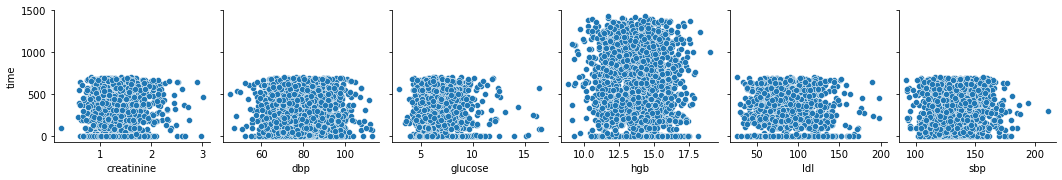

In [18]:
# Create the default pairplot
# sns.pairplot(data.drop(['id'],axis=1))

pp = sns.pairplot(data=data,
                  y_vars=['time'],
                  x_vars=['creatinine',  'dbp', 'glucose', 'hgb', 'ldl', 'sbp'])